In [320]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [282]:
boston = datasets.load_boston()

In [283]:
X_train = boston.data[:379,:]
X_test = boston.data[379:, :]
y_train = boston.target[:379]
y_test = boston.target[379:]

In [291]:
def calculate_errors(target, estimations, eta=1.0):
    return -eta * (estimations - target)

def calculate_mse(target, estimations):
    return np.mean(calculate_errors(target, estimations) ** 2)

def gradients(function, dat, s, eta=1):
    estimations = function(dat)
    return calculate_errors(s, estimations, eta)

In [297]:
trees = []
coeffitients = []
n_trees = 50

In [298]:
coeffitients = []

In [299]:
def gbm_predict(X, base_algorithms_list, coefficients_list):
    return np.array([sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X])

In [300]:
s = y_train.copy()
for n in range(n_trees):
    tree = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree.fit(X_train, s)
    trees.append(tree)
    coeffitients.append(0.9/(1 + n))
    estimations = gbm_predict(X_train, trees, coeffitients)
    s = calculate_errors(y_train, estimations)

In [302]:
quality = mean_squared_error(y_test, gbm_predict(X_test, trees, coeffitients)) ** 0.5
print(quality)
with open('ans2.txt', 'w') as fl:
    fl.write(str(quality))

4.812550945781193


In [306]:
import xgboost as xgb

[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

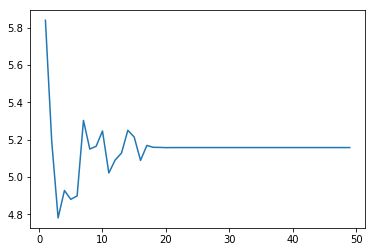

In [318]:
n_estimators = range(10, 5000, 50)
max_depth = range(1, 50, 1)
quality = []
for n in max_depth:
    model = xgb.XGBRegressor(max_depth=n)
    model.fit(X_train, y_train)
    quality.append(mean_squared_error(y_test, model.predict(X_test)) ** 0.5)
    
plt.plot(max_depth, quality)
plt.show()

In [319]:
ans = '2 3'
with open('ans4.txt', 'w') as fl:
    fl.write(ans)

In [323]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
lin_qual = mean_squared_error(y_test, model2.predict(X_test)) ** 0.5
print(lin_qual)
with open('ans5.txt', 'w') as fl:
    fl.write(str(lin_qual))

8.254979753549158
